In [28]:
import warnings

warnings.filterwarnings("ignore")
!pip install cmaps
!pip install rasterio

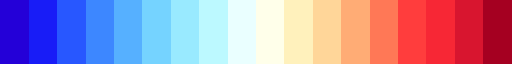

In [29]:
import matplotlib.pyplot as plt
import rasterio as rio


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.ticker as mticker
import xarray as xr
import numpy as np
import pandas  as pd
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable



import cmaps

# blue dark red 18
cmp = cmaps.BlueDarkRed18
cmp

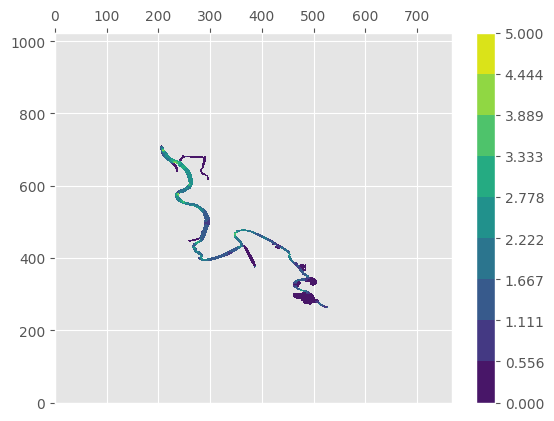

In [34]:
sim1 = rio.open("/kaggle/input/velocity-raster-01/Velocity_03_08_2025.vrt")

m = plt.contourf(sim1.read(1), vmin = 0, vmax = 5, levels = np.linspace(0,5,10))

plt.colorbar(m)

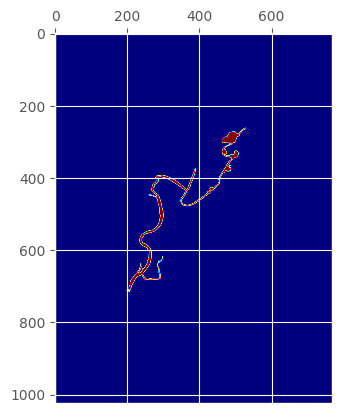

In [33]:
plt.imshow(sim1.read(1), cmap = "jet")

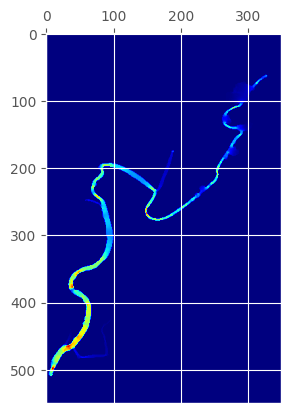

<Axes: >

In [49]:
from rasterio.plot import show

src = sim1.read()
src[src<0]=0
src[src>5]=5

src2 = src[:,200:750,200:550]

show(src2, cmap = "jet")


In [50]:
src2.shape

(1, 550, 350)

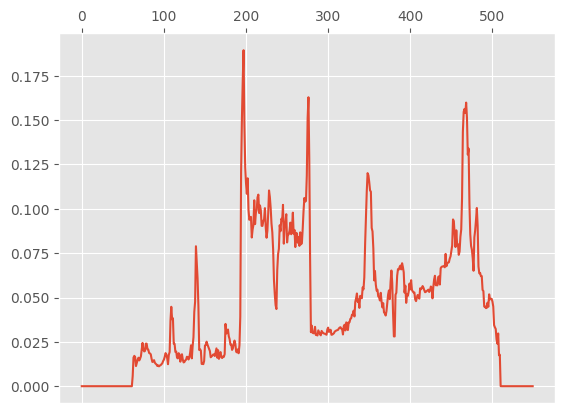

In [52]:
srcm = np.nanmean(src2[0,:,:], axis = 1)

plt.plot(srcm)

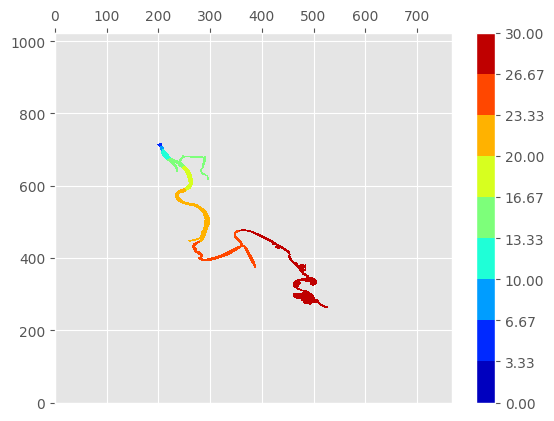

In [59]:
wse1 = rio.open("/kaggle/input/water-level/WSE_01.vrt").read(1)

m = plt.contourf(wse1, vmin = 0, vmax = 30, levels = np.linspace(0,30,10),cmap = "jet")

plt.colorbar(m)

In [62]:
wse1.shape

(1024, 768)

True

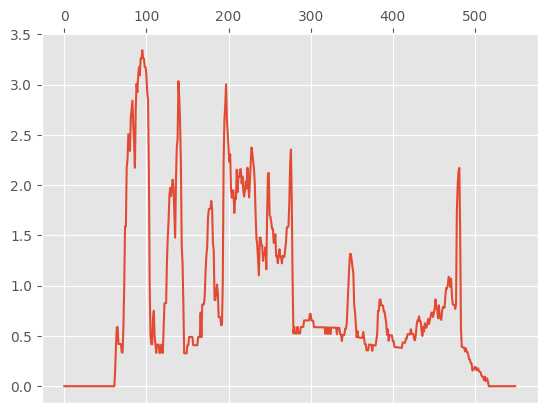

In [65]:
wse1[wse1<0]=0
wse1[wse1>30]=30

wse2 = wse1[200:750,200:550]

wsem = np.nanmean(wse2[:,:], axis = 1)

plt.plot(wsem)

wsem.shape[0] == srcm.shape[0]

In [70]:
import scipy.stats as stats

# Pearson correlation 

correlation_coefficient, p_value = stats.pearsonr(srcm, wsem)

correlation_coefficient

0.46261725

In [77]:

# Student-t-test
# Check if the previous correlation was significant
t_statistic, p_value1 = stats.ttest_ind(srcm,wsem)

# Level of significance
alpha = 0.05  # 95% confidence level


if p_value1<=alpha:
    print(p_value1, "Null hypothesis accepted")
else:
    print(p_value1, "Null hypothesis rejected")



8.011649339722554e-100 Null hypothesis accepted


In [79]:
# Check the Student-t-test of correlation score

r = correlation_coefficient.copy()
n = len(srcm)

# Calculate t-statistic
t = r * ((n - 2) / (1 - r**2))**0.5

# Degrees of freedom
df = n - 2

# Calculate two-tailed p-value
p_value2 = 2 * stats.t.sf(abs(t), df)

if p_value1<=alpha:
    print(p_value2, "Null hypothesis accepted")
else:
    print(p_value2, "Null hypothesis rejected")


1.6137113783546294e-30 Null hypothesis accepted
